In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%matplotlib inline

In [2]:
data = "inc.txt"
data_table = pd.read_csv(data,sep=',')
len(data_table)

337

In [3]:
dataframe = pd.DataFrame(data_table) # df with the incidence
dataframe

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-29T18:00:00,ITA,401,105,506,543,1049,228,240,50,...,18661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01T18:00:00,ITA,639,140,779,798,1577,528,566,83,...,21127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-02T18:00:00,ITA,742,166,908,927,1835,258,342,149,...,23345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-03T18:00:00,ITA,1034,229,1263,1000,2263,428,466,160,...,25856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-04T18:00:00,ITA,1346,295,1641,1065,2706,443,587,276,...,29837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
from datetime import datetime,date
dataframe['data'] = pd.to_datetime(dataframe['data']).dt.normalize()
dataframe

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,tamponi,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,...,4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,...,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,...,9587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,...,12014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,...,15695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-29,ITA,401,105,506,543,1049,228,240,50,...,18661,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01,ITA,639,140,779,798,1577,528,566,83,...,21127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2020-03-02,ITA,742,166,908,927,1835,258,342,149,...,23345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2020-03-03,ITA,1034,229,1263,1000,2263,428,466,160,...,25856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020-03-04,ITA,1346,295,1641,1065,2706,443,587,276,...,29837,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
dataframe['nuovi_positivi_rolling'] = dataframe['nuovi_positivi'].rolling(7).mean()
dataframe

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,nuovi_positivi_rolling
0,2020-02-24,ITA,101,26,127,94,221,0,221,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,ITA,114,35,150,162,311,90,93,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,ITA,128,36,164,221,385,74,78,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,ITA,248,56,304,284,588,203,250,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,ITA,345,64,409,412,821,233,238,46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-02-29,ITA,401,105,506,543,1049,228,240,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2020-03-01,ITA,639,140,779,798,1577,528,566,83,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,240.857143
7,2020-03-02,ITA,742,166,908,927,1835,258,342,149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,258.142857
8,2020-03-03,ITA,1034,229,1263,1000,2263,428,466,160,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.428571
9,2020-03-04,ITA,1346,295,1641,1065,2706,443,587,276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384.142857


C:\Users\camilla\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


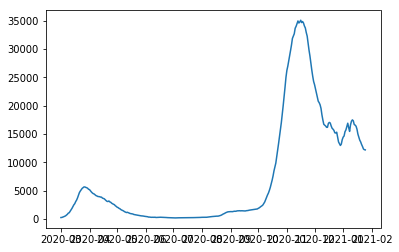

In [6]:
plt.plot(dataframe['data'],dataframe['nuovi_positivi_rolling'])

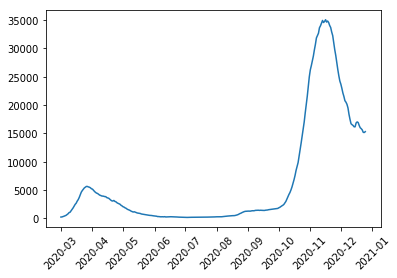

In [7]:
dataframe = dataframe[dataframe['data'].between('2020-03-01','2020-12-25')]
plt.plot(dataframe['data'],dataframe['nuovi_positivi_rolling'])
plt.xticks(rotation=45)
plt.show()

In [8]:
dataframe[dataframe['nuovi_positivi_rolling']== np.max(dataframe['nuovi_positivi_rolling'])]

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,...,casi_testati,note,ingressi_terapia_intensiva,note_test,note_casi,totale_positivi_test_molecolare,totale_positivi_test_antigenico_rapido,tamponi_test_molecolare,tamponi_test_antigenico_rapido,nuovi_positivi_rolling
266,2020-11-16,ITA,32536,3492,36028,681756,717784,5294,27354,442364,...,11505254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35075.285714


In [9]:
df_regionInc = pd.read_csv("covid19dh.csv", dtype = {"Province/State":str, "Country/Region":str})
## cols 7 and 8 were giving me errors, so dtype str is used on them.
df_italyInc = df_regionInc[df_regionInc.ISO3=="ITA"]
df_italyInc= df_italyInc[df_italyInc['Province/State'].isna()]
Infected = df_italyInc['Confirmed'] -  df_italyInc['Recovered'] -  df_italyInc['Deaths'] # prevalence
df_italyInc.insert(3,"Infected",Infected)  

In [10]:
file = '2020_IT_Region_Mobility_Report.csv'
data = pd.read_csv(file,sep=',')
data_df = pd.DataFrame(data)
data_df['date'] = pd.to_datetime(data_df['date'])
data_df = data_df.head(n=329) # we want only national data
data_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-15,3.0,-1.0,35.0,9.0,0.0,-1.0
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-16,3.0,2.0,26.0,11.0,1.0,-2.0
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-17,0.0,1.0,7.0,3.0,1.0,0.0
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-18,3.0,1.0,16.0,4.0,1.0,0.0
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,-1.0,11.0,3.0,1.0,0.0
5,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-20,2.0,1.0,18.0,5.0,1.0,0.0
6,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-21,1.0,1.0,19.0,5.0,0.0,-1.0
7,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-22,-1.0,3.0,30.0,8.0,0.0,-1.0
8,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-23,-5.0,16.0,23.0,6.0,1.0,0.0
9,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-24,-4.0,23.0,22.0,-15.0,-14.0,4.0


In [11]:
data_df['retail_and_recreation_percent_change_from_baseline'] = data_df['retail_and_recreation_percent_change_from_baseline'].rolling(7).mean()
data_df['parks_percent_change_from_baseline'] = data_df['parks_percent_change_from_baseline'].rolling(7).mean()
data_df['transit_stations_percent_change_from_baseline'] = data_df['transit_stations_percent_change_from_baseline'].rolling(7).mean()
data_df['workplaces_percent_change_from_baseline'] = data_df['workplaces_percent_change_from_baseline'].rolling(7).mean()
data_df['residential_percent_change_from_baseline'] = data_df['residential_percent_change_from_baseline'].rolling(7).mean()
data_df['grocery_and_pharmacy_percent_change_from_baseline'] = data_df['grocery_and_pharmacy_percent_change_from_baseline'].rolling(7).mean() 

In [12]:
data_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-15,NaN,NaN,NaN,NaN,NaN,NaN
1,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-16,NaN,NaN,NaN,NaN,NaN,NaN
2,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-17,NaN,NaN,NaN,NaN,NaN,NaN
3,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,NaN,NaN,NaN,NaN,NaN
4,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-19,NaN,NaN,NaN,NaN,NaN,NaN
5,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-20,NaN,NaN,NaN,NaN,NaN,NaN
6,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-21,1.714286,0.571429,18.857143,5.714286,0.714286,-0.571429
7,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-22,1.142857,1.142857,18.142857,5.571429,0.714286,-0.571429
8,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-23,0.000000,3.142857,17.714286,4.857143,0.714286,-0.285714
9,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-02-24,-0.571429,6.285714,19.857143,2.285714,-1.428571,0.285714


In [14]:
#datafra1 = datafra1[dataframe['data'].between('2020-03-01', '2020-12-28')] 
df_italyInc= df_italyInc[df_italyInc['ObservationDate'].between('2020-03-01', '2020-12-25')] 
df_italyInc['Infected'] = df_italyInc['Infected'].rolling(7).mean()
data_df = data_df[data_df['date'].between('2020-03-01','2020-12-25')] 
#len(df_italyInc) == len(data_df)
data_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-01,-10.000000,1.571429,2.571429,-20.000000,-11.285714,4.714286
16,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-02,-11.285714,-2.714286,-4.285714,-21.428571,-10.571429,4.857143
17,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-03,-11.428571,-3.571429,-8.428571,-21.857143,-9.571429,4.714286
18,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-04,-10.571429,-2.714286,-6.428571,-21.285714,-9.000000,4.428571
19,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-05,-10.857143,-2.285714,-8.000000,-22.142857,-9.571429,4.571429
20,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-06,-11.857143,-2.000000,-10.714286,-23.428571,-10.285714,5.000000
21,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-07,-13.142857,-1.571429,-10.714286,-24.571429,-11.142857,5.428571
22,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-08,-15.000000,-0.428571,-6.285714,-24.714286,-11.857143,5.714286
23,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-09,-17.428571,0.428571,-6.000000,-27.142857,-14.000000,6.571429
24,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-10,-22.571429,0.285714,-9.285714,-31.428571,-17.285714,8.285714


In [15]:
len(dataframe) == len(data_df)

True

In [16]:
idx1 = pd.Index(dataframe['data'])   # TO CHECK IF THERE ARE MISSING DATES
idx2 = pd.Index(data_df['date'])
       # len(reg_inc)==len(reg_mob)
missing_dates = idx1.difference(idx2) 
print(missing_dates)
missing_dates1 = idx2.difference(idx1) 
print(missing_dates1)
for w in range(len(missing_dates)):
    data_df = data_df[data_df.date != missing_dates[w]]
for q in range(len(missing_dates1)):
    dataframe = dataframe[dataframe.data != missing_dates1[q]]

DatetimeIndex([], dtype='datetime64[ns]', name='data', freq=None)
DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)


In [17]:
len(data_df) == len(dataframe)

True

In [18]:
len(df_italyInc) == len(data_df)

True

In [19]:
lag = range(0,33,2)

In [20]:
#aa_df

In [21]:
#aa_df.insert(0, "lag", lag)
#aa_df

In [22]:
aa = np.empty((len(lag)*6)).reshape((len(lag),6))
aa[:] = np.nan
aa_df = pd.DataFrame(aa)
#df_tau.insert(1, "reg_code", [13,2,16,17,18,15,8,6,12,7,3,11,14,1,20,19,4,9,10,5]) 
aa_df

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
aa = np.empty((len(lag)*6)).reshape((len(lag),6))
aa[:] = np.nan
aa_df = pd.DataFrame(aa)
#df_tau.insert(1, "reg_code", [13,2,16,17,18,15,8,6,12,7,3,11,14,1,20,19,4,9,10,5]) 
aa_df

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
from datetime import timedelta
for q,j in enumerate(lag):
    mob_in = datetime.strptime('2020-03-10', '%Y-%m-%d')
    m = mob_in + timedelta(days=j)
    inc_startdate = m.strftime("%Y-%m-%d")

    mob_end = datetime.strptime('2020-05-18', '%Y-%m-%d')
    inc = mob_end + timedelta(days=j)
    inc_enddate = inc.strftime("%Y-%m-%d")
    print(inc_startdate)
    print(inc_enddate)
 
    datafra11 = dataframe.copy()
    data_df1 = data_df.copy()
    datafra11 = datafra11[dataframe['data'].between(inc_startdate, inc_enddate)] 
    #df_italyInc1 = df_italyInc1[df_italyInc['ObservationDate'].between(inc_startdate, inc_enddate)] 
    
    data_df1  = data_df1[data_df['date'].between('2020-03-10', '2020-05-18')]

    y1 = data_df1['retail_and_recreation_percent_change_from_baseline']
    y2 = data_df1['parks_percent_change_from_baseline']
    y3 = data_df1['transit_stations_percent_change_from_baseline']
    y4 = data_df1['workplaces_percent_change_from_baseline']
    y5 = data_df1['residential_percent_change_from_baseline']
    y6 = data_df1['grocery_and_pharmacy_percent_change_from_baseline'] 

    tau1, p_value1 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y1)
    tau2, p_value2 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y2)
    tau3, p_value3 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y3)
    tau4, p_value4 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y4)
    tau5, p_value5 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y5)
    tau6, p_value6 = stats.kendalltau(datafra11['nuovi_positivi_rolling'], y6)

    aa_df.loc[q] = [tau1,tau2,tau3,tau4,tau5,tau6]
    print(aa_df)

2020-03-10
2020-05-18
           0         1         2        3         4        5
0  -0.646608 -0.745745 -0.754166 -0.66847  0.743814 -0.51835
1        NaN       NaN       NaN      NaN       NaN      NaN
2        NaN       NaN       NaN      NaN       NaN      NaN
3        NaN       NaN       NaN      NaN       NaN      NaN
4        NaN       NaN       NaN      NaN       NaN      NaN
5        NaN       NaN       NaN      NaN       NaN      NaN
6        NaN       NaN       NaN      NaN       NaN      NaN
7        NaN       NaN       NaN      NaN       NaN      NaN
8        NaN       NaN       NaN      NaN       NaN      NaN
9        NaN       NaN       NaN      NaN       NaN      NaN
10       NaN       NaN       NaN      NaN       NaN      NaN
11       NaN       NaN       NaN      NaN       NaN      NaN
12       NaN       NaN       NaN      NaN       NaN      NaN
13       NaN       NaN       NaN      NaN       NaN      NaN
14       NaN       NaN       NaN      NaN       NaN      NaN
15

           0         1         2         3         4         5
0  -0.646608 -0.745745 -0.754166 -0.668470  0.743814 -0.518350
1  -0.545644 -0.642994 -0.651285 -0.567396  0.640698 -0.414179
2  -0.458507 -0.555766 -0.563948 -0.480168  0.553159 -0.330431
3  -0.382988 -0.480168 -0.488256 -0.404571  0.477293 -0.254975
4  -0.322407 -0.420355 -0.426704 -0.343096  0.415599 -0.191957
5  -0.274274 -0.372172 -0.380124 -0.297405  0.368912 -0.144693
6  -0.246888 -0.343927 -0.351844 -0.268329  0.340566 -0.115672
7  -0.230291 -0.327312 -0.335208 -0.251715  0.323892 -0.099088
8  -0.226142 -0.319835 -0.327722 -0.244238  0.316389 -0.091625
9  -0.225312 -0.319005 -0.326890 -0.243407  0.316389 -0.090796
10 -0.225312 -0.321497 -0.329386 -0.243407  0.317223 -0.092454
11 -0.223652 -0.318174 -0.325227 -0.245069  0.317223 -0.089138
12       NaN       NaN       NaN       NaN       NaN       NaN
13       NaN       NaN       NaN       NaN       NaN       NaN
14       NaN       NaN       NaN       NaN       NaN   

In [29]:
aa_df
aa_df.insert(0, "lag", lag)

# Plot for 'nuovi_positivi'

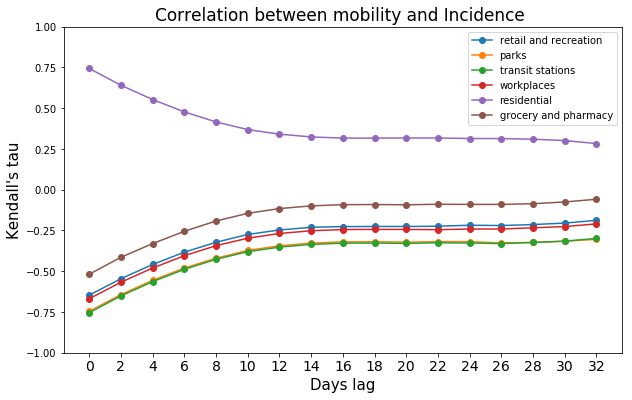

In [30]:
plt.figure(figsize=(10,6))
plt.xticks(aa_df['lag'], aa_df['lag'],size=14)
plt.plot(aa_df['lag'],aa_df[0],marker="o",label='retail and recreation')
plt.plot(aa_df['lag'],aa_df[1],marker="o",label='parks')
plt.plot(aa_df['lag'],aa_df[2],marker="o",label='transit stations')
plt.plot(aa_df['lag'],aa_df[3],marker="o",label='workplaces')
plt.plot(aa_df['lag'],aa_df[4],marker="o",label='residential')
plt.plot(aa_df['lag'],aa_df[5],marker="o",label='grocery and pharmacy')
plt.ylabel("Kendall's tau",size=15)
plt.xlabel("Days lag",size=15)
plt.title('Correlation between mobility and Incidence ',size=17)
plt.ylim(-1,1)
plt.legend(loc='best')

In [31]:
#dt_format_incstart = datetime.strptime('2020-03-01','%Y-%m-%d')
#dt_format_regstart = dt_format_incstart + timedelta(days=25)
#reg_startdate = dt_format_regstart.strftime("%Y-%m-%d") 
#reg_startdate

In [32]:
data_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-01,-10.000000,1.571429,2.571429,-20.000000,-11.285714,4.714286
16,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-02,-11.285714,-2.714286,-4.285714,-21.428571,-10.571429,4.857143
17,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-03,-11.428571,-3.571429,-8.428571,-21.857143,-9.571429,4.714286
18,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-04,-10.571429,-2.714286,-6.428571,-21.285714,-9.000000,4.428571
19,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-05,-10.857143,-2.285714,-8.000000,-22.142857,-9.571429,4.571429
20,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-06,-11.857143,-2.000000,-10.714286,-23.428571,-10.285714,5.000000
21,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-07,-13.142857,-1.571429,-10.714286,-24.571429,-11.142857,5.428571
22,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-08,-15.000000,-0.428571,-6.285714,-24.714286,-11.857143,5.714286
23,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-09,-17.428571,0.428571,-6.000000,-27.142857,-14.000000,6.571429
24,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-10,-22.571429,0.285714,-9.285714,-31.428571,-17.285714,8.285714


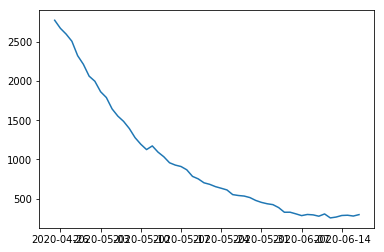

In [33]:
df_pr=dataframe[dataframe['data'].between('2020-04-25','2020-06-17')]
plt.plot(df_pr['data'],df_pr['nuovi_positivi_rolling'])

In [34]:
len(data_df) == len(dataframe)

True

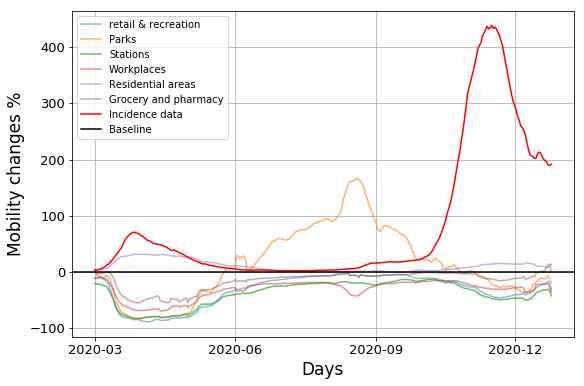

In [35]:
fig, ax = plt.subplots(figsize=(9,6))
from scipy.ndimage.filters import uniform_filter1d
I_max = dataframe['nuovi_positivi_rolling']/80 
y1 = data_df['retail_and_recreation_percent_change_from_baseline']
y2 = data_df['parks_percent_change_from_baseline']
y3 = data_df['transit_stations_percent_change_from_baseline']
y4 = data_df['workplaces_percent_change_from_baseline']
y5 = data_df['residential_percent_change_from_baseline']
y6 = data_df['grocery_and_pharmacy_percent_change_from_baseline'] 
x = data_df['date']
N = 14
#y1 = uniform_filter1d(y1, size=N)
#y2 = uniform_filter1d(y2, size=N)
#y3 = uniform_filter1d(y3, size=N)
#y4 = uniform_filter1d(y4, size=N)
#y5 = uniform_filter1d(y5, size=N)
#y6 = uniform_filter1d(y6, size=N)
#ax.plot(x,y1,"o",markersize=2,label='retail & recreation')
#ax.plot(x,y2,"ro",markersize=2,label='Parks')
#ax.plot(x,y3,"yo",markersize=2,label='Stations')
#ax.plot(x,y4,"o",markersize=2,label='Workplaces')
ax.plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
ax.plot(x,y2,label='Parks',alpha=0.6)
ax.plot(x,y3,label='Stations',alpha=0.7)
ax.plot(x,y4,label='Workplaces',alpha=0.5)
ax.plot(x,y5,label='Residential areas',alpha=0.5)
ax.plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
ax.plot(x,I_max,label='Incidence data',color="red")
#plt.ylim((-110,230))
#plt.xticks(rotation=45) 
ax.grid(True, which='both')
ax.set_xlabel('Days',size=17)
ax.set_ylabel('Mobility changes %',size=17)
ax.set_xticks(ax.get_xticks()[::3])
ax.tick_params(labelsize=13)
ax.axhline(y=0, color='k', label ='Baseline')
ax.legend(loc='best')
ax.legend(fontsize=10)

In [37]:
aa = np.empty((len(lag)*6)).reshape((len(lag),6))
aa[:] = np.nan
aa_df = pd.DataFrame(aa)
#df_tau.insert(1, "reg_code", [13,2,16,17,18,15,8,6,12,7,3,11,14,1,20,19,4,9,10,5]) 
aa_df

,0,1,2,3,4,5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
from datetime import timedelta
for q,j in enumerate(lag):
    mob_in = datetime.strptime('2020-03-10', '%Y-%m-%d')
    m = mob_in + timedelta(days=j)
    inc_startdate = m.strftime("%Y-%m-%d")

    mob_end = datetime.strptime('2020-05-18', '%Y-%m-%d')
    inc = mob_end + timedelta(days=j)
    inc_enddate = inc.strftime("%Y-%m-%d")
    print(inc_startdate)
    print(inc_enddate)
    df_italyInc1 = df_italyInc.copy()
   # dataframe1 = dataframe.copy()
    data_df1 = data_df.copy()
   # dataframe1 = dataframe1[dataframe['data'].between(inc_startdate, inc_enddate)] 
    df_italyInc1 = df_italyInc1[df_italyInc['ObservationDate'].between(inc_startdate, inc_enddate)] 
    
    data_df1  = data_df1[data_df['date'].between('2020-03-10', '2020-05-18')]

    y1 = data_df1['retail_and_recreation_percent_change_from_baseline']
    y2 = data_df1['parks_percent_change_from_baseline']
    y3 = data_df1['transit_stations_percent_change_from_baseline']
    y4 = data_df1['workplaces_percent_change_from_baseline']
    y5 = data_df1['residential_percent_change_from_baseline']
    y6 = data_df1['grocery_and_pharmacy_percent_change_from_baseline'] 

    tau1, p_value1 = stats.kendalltau(df_italyInc1['Infected'], y1)
    tau2, p_value2 = stats.kendalltau(df_italyInc1['Infected'], y2)
    tau3, p_value3 = stats.kendalltau(df_italyInc1['Infected'], y3)
    tau4, p_value4 = stats.kendalltau(df_italyInc1['Infected'], y4)
    tau5, p_value5 = stats.kendalltau(df_italyInc1['Infected'], y5)
    tau6, p_value6 = stats.kendalltau(df_italyInc1['Infected'], y6)

    aa_df.loc[q] = [tau1,tau2,tau3,tau4,tau5,tau6]
    print(aa_df)

2020-03-10
2020-05-18
          0        1        2         3         4         5
0  -0.23527 -0.12295 -0.12144 -0.194393  0.139645 -0.317994
1       NaN      NaN      NaN       NaN       NaN       NaN
2       NaN      NaN      NaN       NaN       NaN       NaN
3       NaN      NaN      NaN       NaN       NaN       NaN
4       NaN      NaN      NaN       NaN       NaN       NaN
5       NaN      NaN      NaN       NaN       NaN       NaN
6       NaN      NaN      NaN       NaN       NaN       NaN
7       NaN      NaN      NaN       NaN       NaN       NaN
8       NaN      NaN      NaN       NaN       NaN       NaN
9       NaN      NaN      NaN       NaN       NaN       NaN
10      NaN      NaN      NaN       NaN       NaN       NaN
11      NaN      NaN      NaN       NaN       NaN       NaN
12      NaN      NaN      NaN       NaN       NaN       NaN
13      NaN      NaN      NaN       NaN       NaN       NaN
14      NaN      NaN      NaN       NaN       NaN       NaN
15      NaN      N

16       NaN       NaN       NaN       NaN       NaN       NaN
2020-03-28
2020-06-05
           0         1         2         3         4         5
0  -0.235270 -0.122950 -0.121440 -0.194393  0.139645 -0.317994
1  -0.314109 -0.202701 -0.197964 -0.272483  0.220513 -0.366087
2  -0.400416 -0.288267 -0.283638 -0.358880  0.307218 -0.419984
3  -0.491702 -0.379649 -0.375134 -0.450262  0.398925 -0.456468
4  -0.586308 -0.474353 -0.469957 -0.546628  0.493967 -0.476369
5  -0.665977 -0.550781 -0.549808 -0.626379  0.574002 -0.492123
6  -0.748964 -0.618902 -0.619677 -0.696992  0.649869 -0.517828
7  -0.834442 -0.700315 -0.687883 -0.753482  0.737407 -0.512024
8  -0.853529 -0.726068 -0.714500 -0.751821  0.773256 -0.468077
9  -0.819504 -0.718591 -0.721987 -0.741021  0.784094 -0.458126
10       NaN       NaN       NaN       NaN       NaN       NaN
11       NaN       NaN       NaN       NaN       NaN       NaN
12       NaN       NaN       NaN       NaN       NaN       NaN
13       NaN       NaN       NaN 

In [39]:
aa_df.insert(0, "lag", lag)
aa_df

,lag,0,1,2,3,4,5
0,0,-0.235270,-0.122950,-0.121440,-0.194393,0.139645,-0.317994
1,2,-0.314109,-0.202701,-0.197964,-0.272483,0.220513,-0.366087
2,4,-0.400416,-0.288267,-0.283638,-0.358880,0.307218,-0.419984
3,6,-0.491702,-0.379649,-0.375134,-0.450262,0.398925,-0.456468
4,8,-0.586308,-0.474353,-0.469957,-0.546628,0.493967,-0.476369
5,10,-0.665977,-0.550781,-0.549808,-0.626379,0.574002,-0.492123
6,12,-0.748964,-0.618902,-0.619677,-0.696992,0.649869,-0.517828
7,14,-0.834442,-0.700315,-0.687883,-0.753482,0.737407,-0.512024
8,16,-0.853529,-0.726068,-0.714500,-0.751821,0.773256,-0.468077
9,18,-0.819504,-0.718591,-0.721987,-0.741021,0.784094,-0.458126


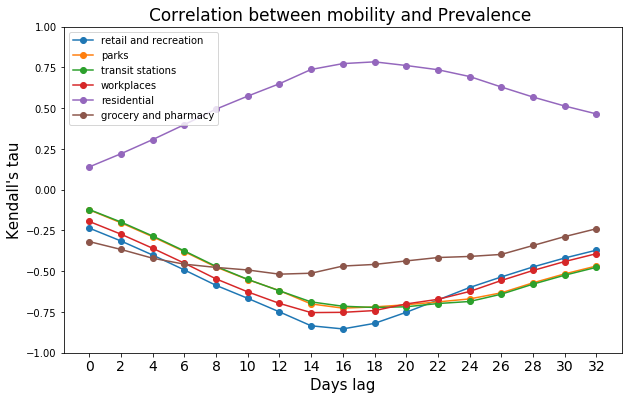

In [40]:
plt.figure(figsize=(10,6))
plt.xticks(aa_df['lag'], aa_df['lag'],size=14)
plt.plot(aa_df['lag'],aa_df[0],marker="o",label='retail and recreation')
plt.plot(aa_df['lag'],aa_df[1],marker="o",label='parks')
plt.plot(aa_df['lag'],aa_df[2],marker="o",label='transit stations')
plt.plot(aa_df['lag'],aa_df[3],marker="o",label='workplaces')
plt.plot(aa_df['lag'],aa_df[4],marker="o",label='residential')
plt.plot(aa_df['lag'],aa_df[5],marker="o",label='grocery and pharmacy')
plt.ylabel("Kendall's tau",size=15)
plt.xlabel("Days lag",size=15)
plt.title('Correlation between mobility and Prevalence ',size=17)
plt.ylim(-1,1)
plt.legend(loc=2)

In [41]:
df_italyIncPR = df_italyInc[df_italyInc['ObservationDate'].between('2020-03-01','2020-12-25')]
len(df_italyIncPR)

300

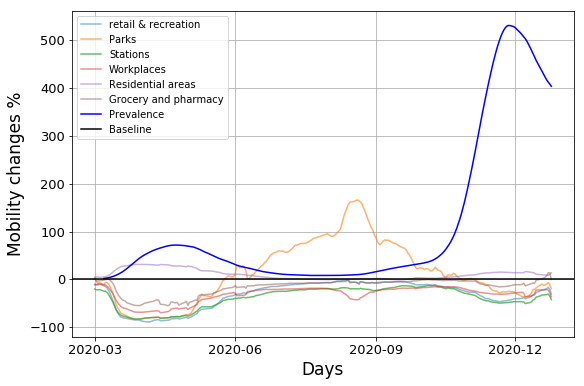

In [42]:
fig, ax = plt.subplots(figsize=(9,6))
from scipy.ndimage.filters import uniform_filter1d
pr=df_italyIncPR['Infected']/1500
y1 = data_df['retail_and_recreation_percent_change_from_baseline']
y2 = data_df['parks_percent_change_from_baseline']
y3 = data_df['transit_stations_percent_change_from_baseline']
y4 = data_df['workplaces_percent_change_from_baseline']
y5 = data_df['residential_percent_change_from_baseline']
y6 = data_df['grocery_and_pharmacy_percent_change_from_baseline'] 
x = data_df['date']
N = 14
#y1 = uniform_filter1d(y1, size=N)
#y2 = uniform_filter1d(y2, size=N)
#y3 = uniform_filter1d(y3, size=N)
#y4 = uniform_filter1d(y4, size=N)
#y5 = uniform_filter1d(y5, size=N)
#y6 = uniform_filter1d(y6, size=N)
#ax.plot(x,y1,"o",markersize=2,label='retail & recreation')
#ax.plot(x,y2,"ro",markersize=2,label='Parks')
#ax.plot(x,y3,"yo",markersize=2,label='Stations')
#ax.plot(x,y4,"o",markersize=2,label='Workplaces')
ax.plot(x,y1,label='retail & recreation',alpha=0.5)  #,linestyle="solid", marker="o",markersize=2)
ax.plot(x,y2,label='Parks',alpha=0.6)
ax.plot(x,y3,label='Stations',alpha=0.7)
ax.plot(x,y4,label='Workplaces',alpha=0.5)
ax.plot(x,y5,label='Residential areas',alpha=0.5)
ax.plot(x,y6,label='Grocery and pharmacy',alpha=0.5)
ax.plot(x,pr,label='Prevalence',color="blue")
#plt.ylim((-110,230))
#plt.xticks(rotation=45) 
ax.grid(True, which='both')
ax.set_xlabel('Days',size=17)
ax.set_ylabel('Mobility changes %',size=17)
ax.set_xticks(ax.get_xticks()[::3])
ax.tick_params(labelsize=13)
ax.axhline(y=0, color='k', label ='Baseline')
ax.legend(loc="best")
ax.legend(fontsize=10)

In [43]:
data_df

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
15,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-01,-10.000000,1.571429,2.571429,-20.000000,-11.285714,4.714286
16,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-02,-11.285714,-2.714286,-4.285714,-21.428571,-10.571429,4.857143
17,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-03,-11.428571,-3.571429,-8.428571,-21.857143,-9.571429,4.714286
18,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-04,-10.571429,-2.714286,-6.428571,-21.285714,-9.000000,4.428571
19,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-05,-10.857143,-2.285714,-8.000000,-22.142857,-9.571429,4.571429
20,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-06,-11.857143,-2.000000,-10.714286,-23.428571,-10.285714,5.000000
21,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-07,-13.142857,-1.571429,-10.714286,-24.571429,-11.142857,5.428571
22,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-08,-15.000000,-0.428571,-6.285714,-24.714286,-11.857143,5.714286
23,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-09,-17.428571,0.428571,-6.000000,-27.142857,-14.000000,6.571429
24,IT,Italy,NaN,NaN,NaN,NaN,NaN,2020-03-10,-22.571429,0.285714,-9.285714,-31.428571,-17.285714,8.285714
